In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d moltean/fruits

 99% 1.27G/1.28G [00:11<00:00, 112MB/s] 
100% 1.28G/1.28G [00:11<00:00, 116MB/s]


In [5]:
!unzip /content/fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Activation, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(100, 100 ,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate=1e-6), metrics = ["accuracy"])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import glob

train_path = '/content/fruits-360_dataset/fruits-360/Training/'
test_path = '/content/fruits-360_dataset/fruits-360/Test/'

classes = ['Avocado', 'Banana', 'Blueberry', 'Guava', 'Kiwi']
cnt_train = [0, 0, 0, 0, 0]
cnt_test = [0, 0, 0, 0, 0]

X_train = []
y_train = []
X_test = []
y_test = []

for idx, _class in enumerate(classes):
  for img in glob.glob(train_path + _class + '/*.jpg'):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train.append(image)
    y_train.append(idx)
    cnt_train[idx] += 1

for idx, _class in enumerate(classes):
  for img in glob.glob(test_path + _class + '/*.jpg'):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_test.append(image)
    y_test.append(idx)
    cnt_test[idx] += 1

print('Training set:')
for idx, cnt in enumerate(cnt_train):
  print(f'{classes[idx]}: {cnt}')

print('Total Training set: ', sum(cnt_train))

print('Testing set:')
for idx, cnt in enumerate(cnt_test):
  print(f'{classes[idx]}: {cnt}')

print('Total Testing set: ', sum(cnt_test))

Training set:
Avocado: 427
Banana: 490
Blueberry: 462
Guava: 490
Kiwi: 466
Total Training set:  2335
Testing set:
Avocado: 143
Banana: 166
Blueberry: 154
Guava: 166
Kiwi: 156
Total Testing set:  785


In [8]:
import numpy as np


X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train / 255
X_test = X_test / 255

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 5)
y_test = to_categorical(y_test, num_classes = 5)

In [45]:
model.fit(x=X_train, y=y_train, epochs=15, batch_size=12);

Epoch 1/15
195/195 [==============================] - 44s 221ms/step - loss: 1.5738 - accuracy: 0.2707
Epoch 2/15
195/195 [==============================] - 43s 218ms/step - loss: 1.4941 - accuracy: 0.4180
Epoch 3/15
195/195 [==============================] - 42s 218ms/step - loss: 1.4184 - accuracy: 0.5208
Epoch 4/15
195/195 [==============================] - 42s 218ms/step - loss: 1.3437 - accuracy: 0.6493
Epoch 5/15
195/195 [==============================] - 42s 217ms/step - loss: 1.2649 - accuracy: 0.7580
Epoch 6/15
195/195 [==============================] - 43s 220ms/step - loss: 1.1786 - accuracy: 0.8330
Epoch 7/15
195/195 [==============================] - 46s 238ms/step - loss: 1.0865 - accuracy: 0.8732
Epoch 8/15
195/195 [==============================] - 43s 221ms/step - loss: 0.9975 - accuracy: 0.9062
Epoch 9/15
195/195 [==============================] - 43s 220ms/step - loss: 0.9068 - accuracy: 0.9143
Epoch 10/15
195/195 [==============================] - 43s 220ms/step - l

25/25 [==============================] - 4s 174ms/step


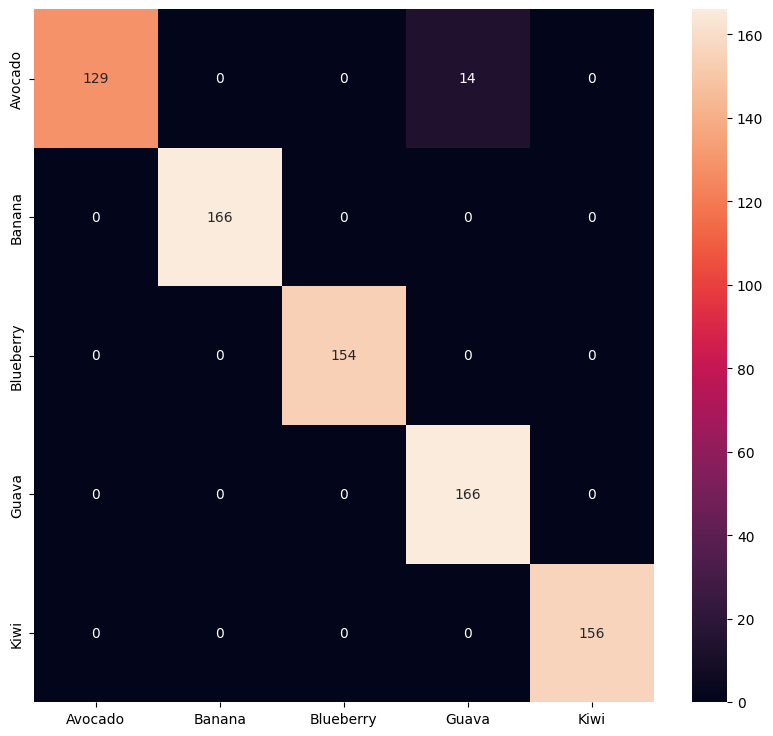

In [46]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(cm, annot=True, fmt=".0f")
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: ', accuracy_score(y_true, y_pred))
print('Precision: ', precision_score(y_true, y_pred, average='macro'))
print('Recall: ', recall_score(y_true, y_pred, average='macro'))
print('F1-Score: ', f1_score(y_true, y_pred, average='macro'))

Accuracy:  0.9821656050955414
Precision:  0.9844444444444445
Recall:  0.9804195804195803
F1-Score:  0.9816133968038082
